In [23]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [24]:
# Load dataset
df = pd.read_csv('online_shoppers_intention.csv')
# View first few rows
print(df.head())
# Check data types and missing values
print(df.info())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [26]:
# Encode categorical columns
label_cols = ['Month', 'VisitorType']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# Convert boolean columns to int
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)


In [27]:
# Define features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [28]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [29]:
# Set up parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [30]:
# Initialize and train model using GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
# Get best model
best_model = grid_search.best_estimator_


In [32]:
# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nBest Parameters:", grid_search.best_params_)


Accuracy: 0.8961881589618816

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3127
           1       0.69      0.59      0.64       572

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699


Confusion Matrix:
 [[2977  150]
 [ 234  338]]

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


In [34]:
# Cross-validation accuracy
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(best_model, X, y, cv=5)
print("\nCross-Validation Accuracy:", cv_score.mean())


Cross-Validation Accuracy: 0.8892133008921329


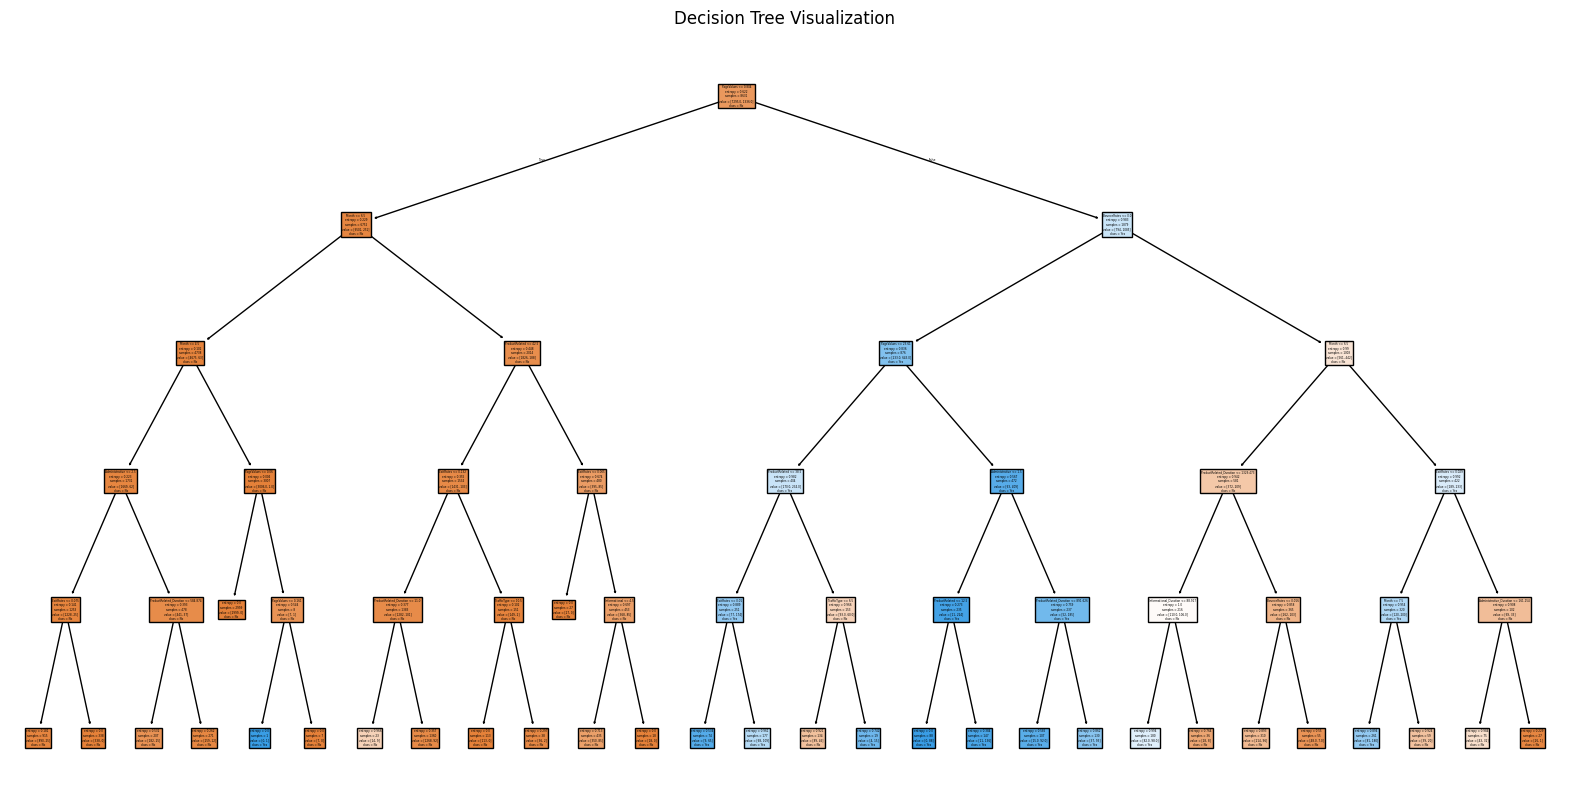

In [35]:
# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


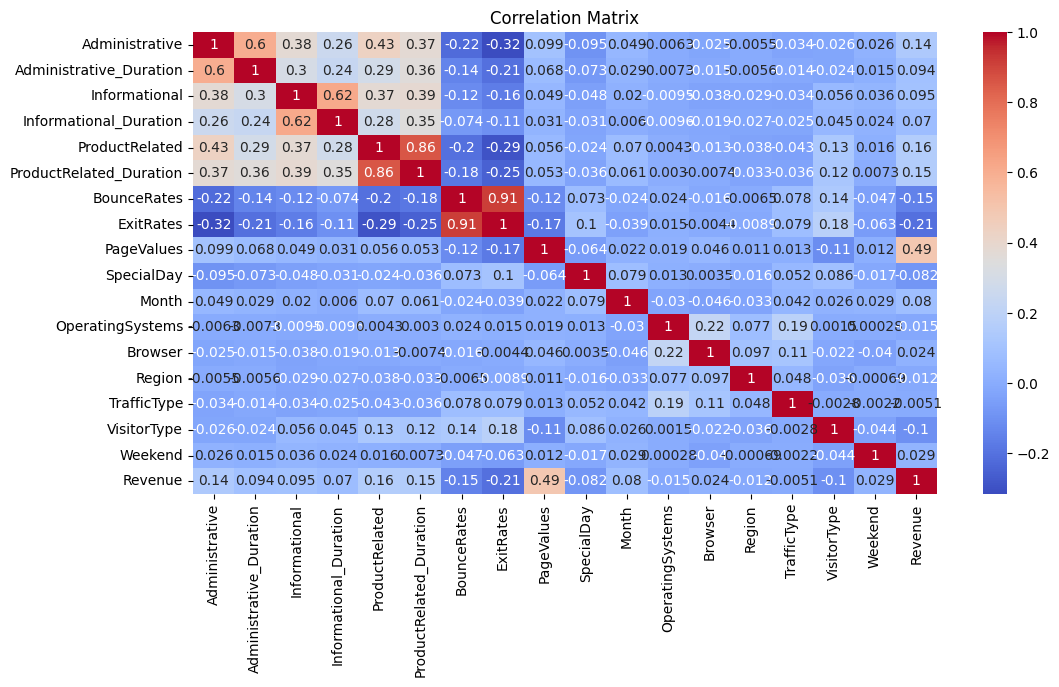

In [36]:
# Plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

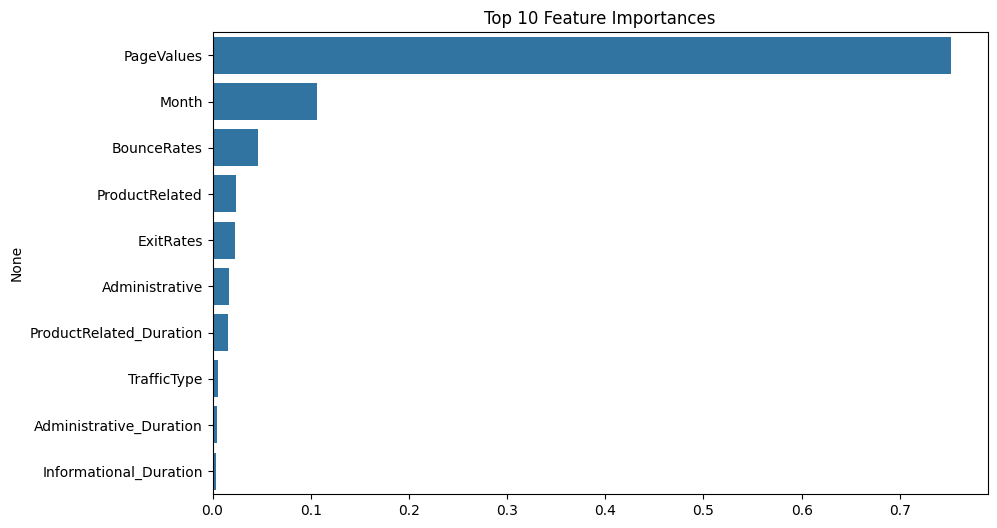

In [38]:
# Plot top 10 feature importances
importances = best_model.feature_importances_
indices = importances.argsort()[::-1]
top_features = X.columns[indices][:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=top_features)
plt.title("Top 10 Feature Importances")
plt.show()